# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

## Upload train_data,test_data , test_data_hidden & train_data_tfidf

In [2]:
train_data = pd.read_csv(r'C:\Users\zubair_khan\Desktop\Data_Science\Projects\Capstone-Project-2-digi-chrome\data\cleaned_train_data.csv')
test_data = pd.read_csv(r'C:\Users\zubair_khan\Desktop\Data_Science\Projects\Capstone-Project-2-digi-chrome\data\cleaned_test_data.csv')
test_data_hidden = pd.read_csv(r'C:\Users\zubair_khan\Desktop\Data_Science\Projects\Capstone-Project-2-digi-chrome\data\cleaned_test_data_hidden.csv')
train_data_tfidf = pd.read_csv(r'C:\Users\zubair_khan\Desktop\Data_Science\Projects\Capstone-Project-2-digi-chrome\data\train_data_tfidf.csv')

In [3]:
test_data_hidden.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23,Amazon kindle fire has a lot of free app and c...,very handy device,Positive,23,5,2016
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive,2,1,2018
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive,2,1,2017
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive,25,3,2017
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15,This is a fantastic item & the person I bought...,Fantastic!,Positive,15,11,2017


## Prepare Data

### TF-IDF Transformation

In [4]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  
    stop_words='english', 
    ngram_range=(1, 2) 
)
# Fit and transform the review text
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

In [5]:
tfidf_matrix.shape

(3932, 5000)

In [6]:
X = tfidf_matrix 
y = train_data['sentiment']

In [7]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [8]:
X_train.shape , X_test.shape

((3145, 5000), (787, 5000))

# Task-2.1- Multi-class SVM and Neural Nets:

### 1. Train and Evaluate the SVM Model:

In [9]:
# Initialize the SVM classifier with an RBF kernel
svm_clf = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))

In [10]:
# Train the model
svm_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(probability=True, random_state=42))

In [11]:
# Predict on test data
y_pred_svm = svm_clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       1.00      0.11      0.20        18
     Neutral       1.00      0.03      0.06        32
    Positive       0.94      1.00      0.97       737

    accuracy                           0.94       787
   macro avg       0.98      0.38      0.41       787
weighted avg       0.94      0.94      0.91       787



### 2. Neural Network Implementation

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
print(y_train.unique())
print(y_test.unique())

['Positive' 'Neutral' 'Negative']
['Positive' 'Neutral' 'Negative']


In [15]:
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

In [16]:
#Preprocess Labels for Neural Network:
# One-hot encode the target labels for neural networks
y_train_nn = to_categorical(y_train, num_classes=3)
y_test_nn = to_categorical(y_test, num_classes=3)

In [17]:
# Build the Neural Network Model:
# Define the MLP model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3), 
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])

In [18]:
# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Model summary
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 648,579 (2.47 MB)

 Trainable params: 648,579 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model
history = nn_model.fit(X_train, y_train_nn, epochs=10, batch_size=32, validation_data=(X_test, y_test_nn), verbose=1)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8930 - loss: 0.6816 - val_accuracy: 0.9365 - val_loss: 0.2561
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9393 - loss: 0.2127 - val_accuracy: 0.9365 - val_loss: 0.2278
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9387 - loss: 0.1489 - val_accuracy: 0.9365 - val_loss: 0.2269
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9473 - loss: 0.0986 - val_accuracy: 0.9416 - val_loss: 0.2377
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9831 - loss: 0.0547 - val_accuracy: 0.9441 - val_loss: 0.2750
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9948 - loss: 0.0293 - val_accuracy: 0.9428 - val_loss: 0.3182
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9998 - loss: 0.0125 - val_accuracy: 0.9454 - val_loss: 0.3561
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9997 - loss: 0.0082 - val_accuracy: 0.9454 - v

In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test_nn, verbose=0)
print(f"Neural Network Test Accuracy: {test_accuracy:.2f}")

Neural Network Test Accuracy: 0.94


In [22]:
# Predict on test data
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_labels = y_pred_nn.argmax(axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [23]:
# Classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn_labels, target_names=['Negative', 'Neutral', 'Positive']))

Neural Network Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.22      0.32        18
     Neutral       0.53      0.25      0.34        32
    Positive       0.95      0.99      0.97       737

    accuracy                           0.94       787
   macro avg       0.69      0.49      0.54       787
weighted avg       0.93      0.94      0.93       787



### 3. Visualize Neural Network Training Performance

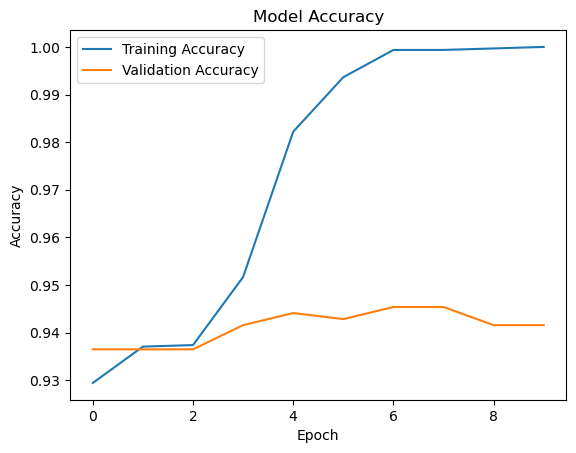

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

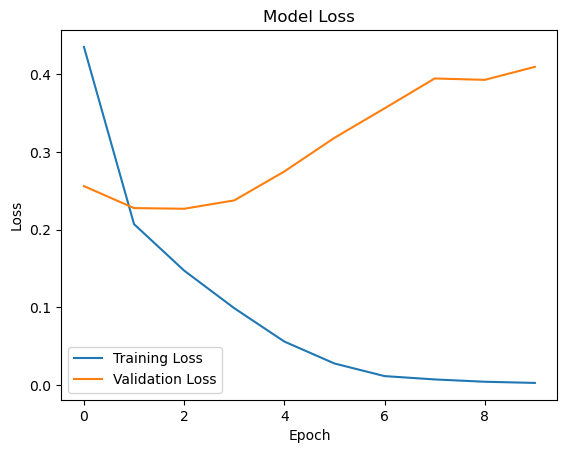

In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Summary:
### 1. SVM:

Works well for smaller feature sets.
Macro AUC-ROC and classification reports give insight into performance.
Computationally expensive for large datasets.
### 2. Neural Networks:

Scales well with large datasets and captures complex relationships.
Requires careful tuning of hyperparameters (e.g., layers, dropout).

# Task-2.2- Ensemble Techniques:

### Implementing Ensemble Techniques: XGBoost and Naive Bayes

### 1. Address Class Imbalance with SMOTE

In [26]:
# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({2: 2947, 1: 2947, 0: 2947})


### 2. Train Individual Models

### Train XGBoost

In [27]:
# Initialize and train the XGBoost classifier
xgb_clf = XGBClassifier(objective='multi:softprob', num_class=3, random_state=42)
xgb_clf.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [28]:
# Predict using XGBoost
y_pred_xgb = xgb_clf.predict(X_test)

### Train Multinomial Naive Bayes

In [29]:
# Initialize and train the Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [30]:
# Predict using Naive Bayes
y_pred_nb = nb_clf.predict(X_test)

### 3. Ensemble with Voting Classifier

In [31]:
# Initialize Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_clf), ('nb', nb_clf)],
    voting='soft'
)

In [32]:
# Train Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=3, num_parallel_tree=None, ...)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [33]:
# Predict using the ensemble model
y_pred_voting = voting_clf.predict(X_test)

### 4. Evaluate Model Performance

In [34]:
# Classification report for the ensemble model
print("Ensemble Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting, target_names=['Negative', 'Neutral', 'Positive']))

Ensemble Voting Classifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.44      0.52        18
     Neutral       0.43      0.28      0.34        32
    Positive       0.96      0.98      0.97       737

    accuracy                           0.94       787
   macro avg       0.67      0.57      0.61       787
weighted avg       0.93      0.94      0.93       787



In [35]:
# Predict probabilities for ROC-AUC evaluation
y_proba_voting = voting_clf.predict_proba(X_test)

In [36]:
# Compute macro AUC-ROC score
roc_auc_voting = roc_auc_score(label_binarize(y_test, classes=[0, 1, 2]), y_proba_voting, average='macro')
print(f"Macro AUC-ROC Score (Voting Classifier): {roc_auc_voting:.2f}")

Macro AUC-ROC Score (Voting Classifier): 0.88


## Summary
### 1. XGBoost:

Trained on oversampled data using SMOTE.
Evaluated with metrics like precision, recall, F1-score, and ROC-AUC.
### 2. Naive Bayes:

Simpler model, included for diversity in the ensemble.
### 3. Voting Classifier:

Combined predictions from XGBoost and Naive Bayes, leveraging strengths from both models.

# Task-2.3- Feature Engineering:

### 1. Define Sentiment Analysis Functions

In [37]:
# Function to calculate sentiment score using TextBlob
def compute_sentiment_textblob(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

In [38]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score using VADER
def compute_sentiment_vader(review):
    scores = analyzer.polarity_scores(review)
    return scores['compound'] 

### 2. Apply Sentiment Analysis to Dataset

#### Using TextBlob:

In [39]:
# Compute sentiment scores for the reviews
train_data['sentiment_score_textblob'] = train_data['reviews.text'].apply(compute_sentiment_textblob)
test_data['sentiment_score_textblob'] = test_data['reviews.text'].apply(compute_sentiment_textblob)

#### Using VADER:

In [40]:
# Compute sentiment scores for the reviews
train_data['sentiment_score_vader'] = train_data['reviews.text'].apply(compute_sentiment_vader)
test_data['sentiment_score_vader'] = test_data['reviews.text'].apply(compute_sentiment_vader)

### 3. ombine Sentiment Scores

In [41]:
# If using both TextBlob and VADER, combine them into a single feature by averaging:abs
train_data['sentiment_score'] = train_data[['sentiment_score_textblob', 'sentiment_score_vader']].mean(axis=1)
test_data['sentiment_score'] = test_data[['sentiment_score_textblob', 'sentiment_score_vader']].mean(axis=1)

In [42]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year,sentiment_score_textblob,sentiment_score_vader,sentiment_score
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,26,12,2016,0.363542,0.9709,0.667221
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,17,1,2018,0.458214,0.9716,0.714907
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20,Just an average Alexa option. Does show a few ...,Average,Neutral,20,12,2017,-0.140476,-0.3291,-0.234788
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,4,8,2017,0.690000,0.7496,0.719800
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,23,1,2017,0.187500,0.1779,0.182700


In [43]:
test_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,reviews_day,reviews_month,reviews_year,sentiment_score_textblob,sentiment_score_vader,sentiment_score
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23,Amazon kindle fire has a lot of free app and c...,very handy device,23,5,2016,0.300000,0.3818,0.34090
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2,1,2018,0.457359,0.9944,0.72588
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2,1,2017,0.900000,0.8934,0.89670
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25,"I use mine for email, Facebook ,games and to g...",Love it!!!,25,3,2017,0.009259,0.5994,0.30433
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15,This is a fantastic item & the person I bought...,Fantastic!,15,11,2017,0.400000,0.8074,0.60370


### 4. Visualize the Sentiment Score Distribution

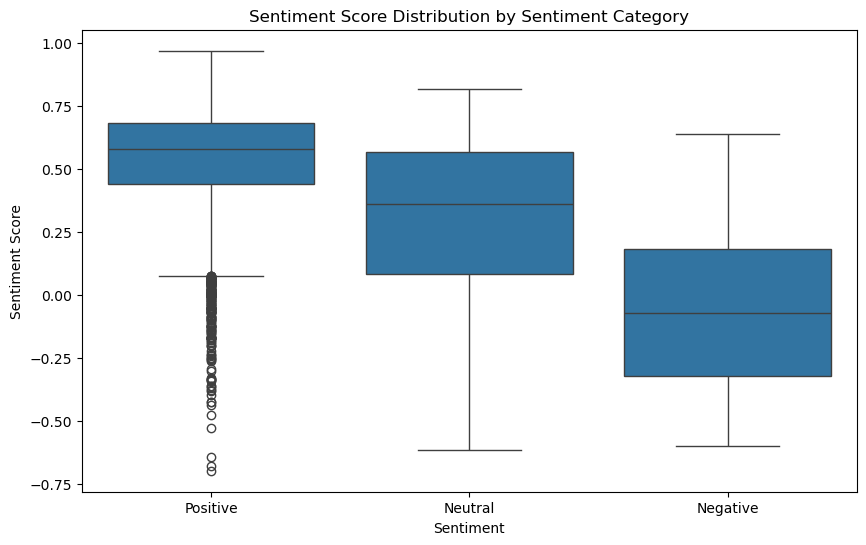

In [44]:
# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='sentiment_score', data=train_data)
plt.title("Sentiment Score Distribution by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Score")
plt.show()

### 5. Use Sentiment Score as a Feature

In [45]:
X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())

In [46]:
X_train['sentiment_score'] = train_data['sentiment_score'].reset_index(drop=True)
X_test['sentiment_score'] = test_data['sentiment_score'].reset_index(drop=True)

# task- 2.4- LSTM Implementation:

### 1. Preprocess the Data

In [47]:
# Parameters
# Hyperparameters
max_words = 10000  
max_len = 100 
embedding_dim = 128  
num_classes = 3 
# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['reviews.text'])

In [48]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data['reviews.text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data_hidden['reviews.text'])

In [49]:
# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

In [50]:
# Map sentiments to numeric classes
# Map sentiment labels to integers
sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_train = train_data['sentiment'].map(sentiment_map).values
y_test = test_data_hidden['sentiment'].map(sentiment_map).values

### 2. Build the LSTM Model

In [51]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len), 
    LSTM(64, return_sequences=True),  
    Dropout(0.5), 
    LSTM(32),  
    Dense(64, activation='relu'),  
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [52]:
# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 3. Train the Model

In [54]:
# Split train set into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_padded, y_train, test_size=0.2, random_state=42
)

In [55]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32, 
    verbose=1
)

Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - accuracy: 0.9124 - loss: 0.4493 - val_accuracy: 0.9301 - val_loss: 0.2927
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.9378 - loss: 0.2893 - val_accuracy: 0.9314 - val_loss: 0.2902
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9417 - loss: 0.2671 - val_accuracy: 0.9314 - val_loss: 0.2892
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - accuracy: 0.9371 - loss: 0.2970 - val_accuracy: 0.9314 - val_loss: 0.2968
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.9492 - loss: 0.2446 - val_accuracy: 0.9339 - val_loss: 0.2894
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9451 - loss: 0.2599 - val_accuracy: 0.9314 - val_loss: 0.2969
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.9459 - loss: 0.2412 - val_accuracy: 0.9314 - val_loss: 0.2904
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9381 - loss: 0.2691 - val_accu

### 4. Evaluate the Model

In [56]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9443 - loss: 0.2587
Test Accuracy: 93.76%


In [57]:
# Predict sentiment classes
y_pred = np.argmax(model.predict(X_test_padded), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step


In [58]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       1.00      0.04      0.08        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       931

    accuracy                           0.94       994
   macro avg       0.65      0.35      0.35       994
weighted avg       0.90      0.94      0.91       994



### 5. Visualize Model Performance

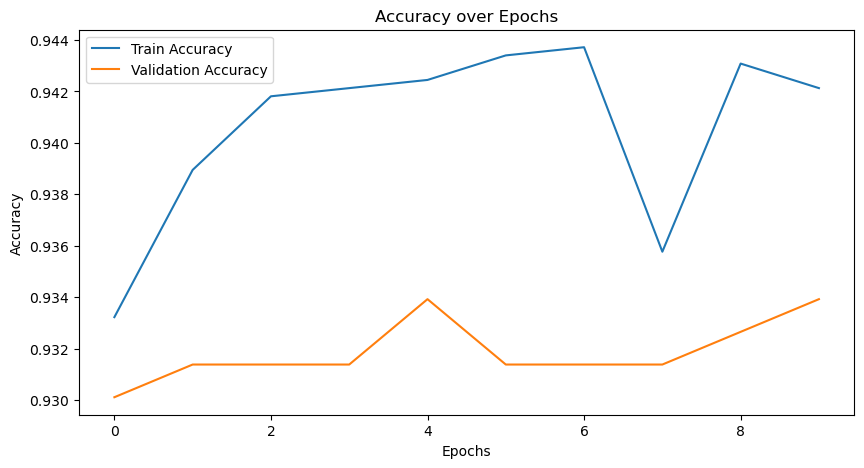

In [59]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

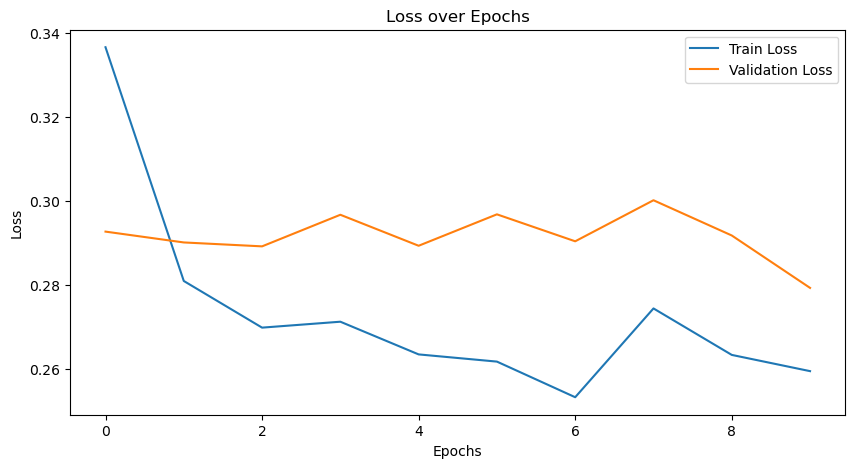

In [60]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task-2.5- Comparison:

### 1. Preprocess Data (Shared Across Models)

In [61]:
# Preprocess data (similar to previous code)
max_words = 10000
max_len = 100
# Tokenize the text using Tfidf Vectorizer (for traditional models)
tfidf_vectorizer = TfidfVectorizer(max_features=max_words, stop_words='english')
X_tfidf_train = tfidf_vectorizer.fit_transform(train_data['reviews.text'])
X_tfidf_test = tfidf_vectorizer.transform(test_data_hidden['reviews.text'])

In [62]:
# Encode sentiment labels
sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
y_train = train_data['sentiment'].map(sentiment_map).values
y_test = test_data_hidden['sentiment'].map(sentiment_map).values

### 2. Train Traditional Models

#### Naive Bayes

In [63]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_tfidf_train, y_train)
# Predict on test set
y_pred_nb = nb_model.predict(X_tfidf_test)

In [64]:
# Evaluate Naive Bayes performance
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Negative', 'Neutral', 'Positive']))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       931

    accuracy                           0.94       994
   macro avg       0.31      0.33      0.32       994
weighted avg       0.88      0.94      0.91       994



#### Support Vector Machine (SVM)

In [65]:
# Train SVM classifier
svm_model = SVC(kernel='linear', class_weight='balanced')  
svm_model.fit(X_tfidf_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_tfidf_test)

In [66]:
# Evaluate SVM performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.38      0.46        24
     Neutral       0.33      0.44      0.37        39
    Positive       0.96      0.96      0.96       931

    accuracy                           0.93       994
   macro avg       0.63      0.59      0.60       994
weighted avg       0.93      0.93      0.93       994



#### Random Forest

In [67]:
# Train Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model.fit(X_tfidf_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_tfidf_test)

In [68]:
# Evaluate Random Forest performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive']))

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.29      0.45        24
     Neutral       1.00      0.26      0.41        39
    Positive       0.95      1.00      0.98       931

    accuracy                           0.95       994
   macro avg       0.98      0.52      0.61       994
weighted avg       0.96      0.95      0.94       994



#### Train Neural Network (LSTM)

In [69]:
# Train the LSTM model (same code as previously)
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.9406 - loss: 0.2607 - val_accuracy: 0.9327 - val_loss: 0.2814
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.9379 - loss: 0.2683 - val_accuracy: 0.9352 - val_loss: 0.2647
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.9439 - loss: 0.2372 - val_accuracy: 0.9416 - val_loss: 0.2457
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.9400 - loss: 0.2655 - val_accuracy: 0.9377 - val_loss: 0.2402
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9487 - loss: 0.2028 - val_accuracy: 0.9441 - val_loss: 0.2275
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.9481 - loss: 0.2187 - val_accuracy: 0.9365 - val_loss: 0.2535
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.9477 - loss: 0.2445 - val_accuracy: 0.9416 - val_loss: 0.2418
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.9470 - loss: 0

In [70]:
# Evaluate LSTM performance
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
y_pred_lstm = np.argmax(model.predict(X_test_padded), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9411 - loss: 0.2412
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [71]:
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=['Negative', 'Neutral', 'Positive']))

LSTM Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.04      0.08        24
     Neutral       0.36      0.13      0.19        39
    Positive       0.94      0.99      0.97       931

    accuracy                           0.94       994
   macro avg       0.77      0.39      0.41       994
weighted avg       0.92      0.94      0.92       994



### 3.Comparison of Models

In [72]:
sentiment_map = {'Positive': 2, 'Neutral': 1, 'Negative': 0}

In [73]:
# Collect metrics from each model into a DataFrame for comparison
metrics = {
    'Model': ['Naive Bayes', 'SVM', 'Random Forest', 'LSTM'],
    'Precision (Positive)': [
        classification_report(y_test, y_pred_nb, output_dict=True)['2']['precision'],  # Use '2' instead of 'Positive'
        classification_report(y_test, y_pred_svm, output_dict=True)['2']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['2']['precision'],
        classification_report(y_test, y_pred_lstm, output_dict=True)['2']['precision']
    ],
    'Recall (Positive)': [
        classification_report(y_test, y_pred_nb, output_dict=True)['2']['recall'],
        classification_report(y_test, y_pred_svm, output_dict=True)['2']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['2']['recall'],
        classification_report(y_test, y_pred_lstm, output_dict=True)['2']['recall']
    ],
    'F1-Score (Positive)': [
        classification_report(y_test, y_pred_nb, output_dict=True)['2']['f1-score'],
        classification_report(y_test, y_pred_svm, output_dict=True)['2']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['2']['f1-score'],
        classification_report(y_test, y_pred_lstm, output_dict=True)['2']['f1-score']
    ],
    'Accuracy': [
        classification_report(y_test, y_pred_nb, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_svm, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_rf, output_dict=True)['accuracy'],
        test_accuracy * 100  # LSTM accuracy
    ]
}

In [74]:
# Create a DataFrame for comparison
df_comparison = pd.DataFrame(metrics)
print(df_comparison)

           Model  Precision (Positive)  Recall (Positive)  \
0    Naive Bayes              0.936620           1.000000   
1            SVM              0.964401           0.960258   
2  Random Forest              0.952917           1.000000   
3           LSTM              0.944842           0.993555   

   F1-Score (Positive)   Accuracy  
0             0.967273   0.936620  
1             0.962325   0.925553  
2             0.975891   0.953722  
3             0.968586  93.661970  


## Interpret Results
### Traditional Models: 
While simpler, they might perform reasonably well with text data, but the performance could suffer with more complex data patterns and longer sequences in text.
### LSTM Model: 
    The neural network, especially the LSTM, is expected to perform better for sequential data, such as text, by capturing the context and dependencies between words.

# Task-2.6- Optimization:

### 1.  Define the LSTM Model Function

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [76]:
TOP_WORDS = 10000  
MAX_SEQUENCE_LENGTH = 100  

# Tokenize the text data
tokenizer = Tokenizer(num_words=TOP_WORDS, oov_token="<UNK>")
tokenizer.fit_on_texts(train_data['reviews.text'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_data['reviews.text'])
X_test_seq = tokenizer.texts_to_sequences(test_data_hidden['reviews.text'])

# Pad sequences to ensure uniform input length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [78]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train_data['sentiment'])
y_test_encoded = label_encoder.transform(test_data_hidden['sentiment'])

In [104]:
# Define model creation function
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [105]:
# Wrap with KerasClassifier
model = KerasClassifier(build_fn=create_model, input_shape=X_train_pad.shape[1])

In [106]:
# Define parameter grid
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
}

In [107]:
# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [108]:
grid_search.fit(X_train_pad, y_train_encoded)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0375 - loss: -395.1640
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0354 - loss: -17166.8535
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0405 - loss: -153816.9531
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0356 - loss: -587089.7500
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0397 - loss: -1427238.2500
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0414 - loss: -3061840.2500
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0387 - loss: -5307838.0000
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0456 - loss: -8152906.0000
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0418 - loss: -12002655.0000
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0310 - loss: -17651796.0000
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accu

GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function create_model at 0x00000211103F4220>, input_shape=100),
             param_grid={'batch_size': [32, 64], 'epochs': [10, 20]})

### 2. Hyperparameter Optimization for Traditional Machine Learning Models

In [109]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],        # Regularization type
    'solver': ['liblinear', 'saga']
}

In [113]:
# Grid Search for Logistic Regression
from sklearn.linear_model import LogisticRegression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_lr, cv=3, verbose=2, n_jobs=-1)
grid_search_lr_result = grid_search_lr.fit(tfidf_matrix, y_train_encoded)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [114]:
grid_search_lr_result 

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [115]:
# Best parameters and score
print(f"Best parameters for Logistic Regression: {grid_search_lr_result.best_params_}")
print(f"Best score for Logistic Regression: {grid_search_lr_result.best_score_}")

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best score for Logistic Regression: 0.9448122463476979


### 3. SVM Optimization Example:

In [116]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

In [117]:
# Grid Search for SVM
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=3, verbose=2, n_jobs=-1)
grid_search_svm_result = grid_search_svm.fit(tfidf_matrix, y_train_encoded)
grid_search_svm_result

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [118]:
# Best parameters and score
print(f"Best parameters for SVM: {grid_search_svm_result.best_params_}")
print(f"Best score for SVM: {grid_search_svm_result.best_score_}")

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM: 0.9448120522569838


### 4. Cross-Validation for Performance Evaluation

In [120]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(MultinomialNB(), tfidf_matrix, y_train_encoded, cv=5, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Scores: {nb_cv_scores}")
print(f"Naive Bayes Average Cross-Validation Score: {np.mean(nb_cv_scores):.4f}")

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(LogisticRegression(C=1, solver='liblinear'), tfidf_matrix, y_train_encoded, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {lr_cv_scores}")
print(f"Logistic Regression Average Cross-Validation Score: {np.mean(lr_cv_scores):.4f}")

# Cross-validation for SVM
svm_cv_scores = cross_val_score(SVC(C=1, kernel='linear'), tfidf_matrix, y_train_encoded, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Scores: {svm_cv_scores}")
print(f"SVM Average Cross-Validation Score: {np.mean(svm_cv_scores):.4f}")

Naive Bayes Cross-Validation Scores: [0.93773825 0.93900889 0.9389313  0.9389313  0.93765903]
Naive Bayes Average Cross-Validation Score: 0.9385
Logistic Regression Cross-Validation Scores: [0.9364676  0.9364676  0.93765903 0.93765903 0.93638677]
Logistic Regression Average Cross-Validation Score: 0.9369
SVM Cross-Validation Scores: [0.94282084 0.94536213 0.94147583 0.94147583 0.94274809]
SVM Average Cross-Validation Score: 0.9428


### Grid Search and Random Search for Best Hyperparameters
1. GridSearchCV tries all combinations of the parameter grid, so it’s exhaustive but can be computationally expensive.
2. RandomizedSearchCV samples from the parameter grid randomly and evaluates a limited number of combinations, making it more efficient than Grid Search.

### Summary of Optimization Techniques
1. LSTM Model: Random Search can be used to explore a wide range of hyperparameters, including the number of layers, units per layer, dropout rates, and more.
2. Traditional ML Models: For models like Logistic Regression, SVM, and Naive Bayes, Grid Search and Random Search are applied to tune regularization parameters, kernel types, and other hyperparameters.
3. Cross-Validation: Cross-validation is essential to evaluate the performance of the model in a robust manner and to assess its generalization ability.


## Task-2.7- Topic Modelling:

### 1. Topic Modeling with LDA (Latent Dirichlet Allocation)

In [122]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Vectorizing the reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(train_data['reviews.text'])

In [123]:
# Step 2: Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42) 
lda.fit(X_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [124]:
# Step 3: Display the top words for each topic
n_top_words = 10  
terms = tfidf_vectorizer.get_feature_names_out()

In [125]:
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("\n")

Topic #1:
tablet great use good price kids amazon easy product love


Topic #2:
great tablet good battery easy kindle use price life light


Topic #3:
echo alexa love music great home sound use smart fun


Topic #4:
loves bought old gift year tablet daughter easy christmas son


Topic #5:
kindle love books read tablet great games reading apps like




### 2. Topic Modeling with NMF (Non-Negative Matrix Factorization)

In [127]:
# Fit NMF model
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=42) 
nmf.fit(X_tfidf)

NMF(n_components=5, random_state=42)

In [128]:
# Display the top words for each topic
n_top_words = 10  
terms = tfidf_vectorizer.get_feature_names_out()

In [129]:
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("\n")

Topic #1:
tablet good price apps kids kindle games amazon like reading


Topic #2:
loves bought old year gift daughter grandson christmas son purchased


Topic #3:
easy use set product setup fun super recommend read light


Topic #4:
love echo alexa music amazon home plus screen like just


Topic #5:
great product works price recommend kids sound buy gift quality




### 4. Visualizing the Topics 

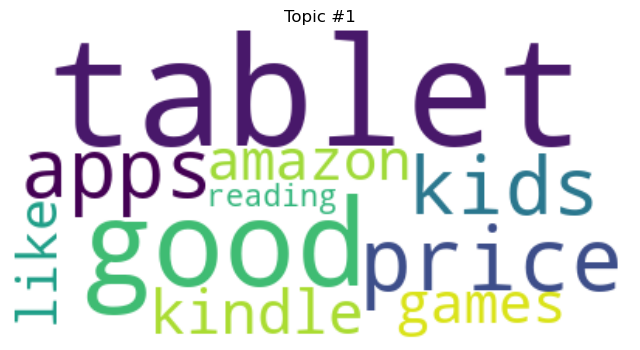

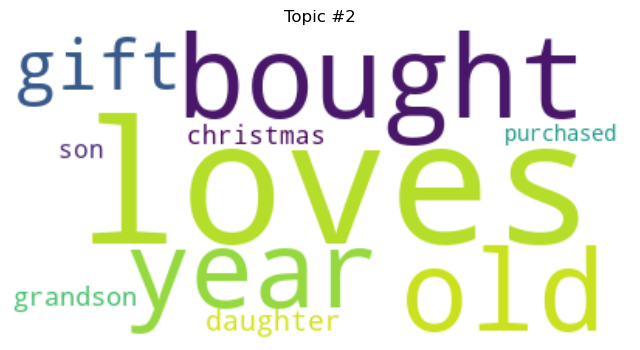

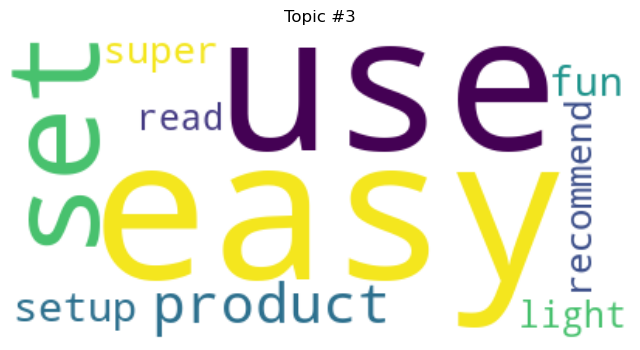

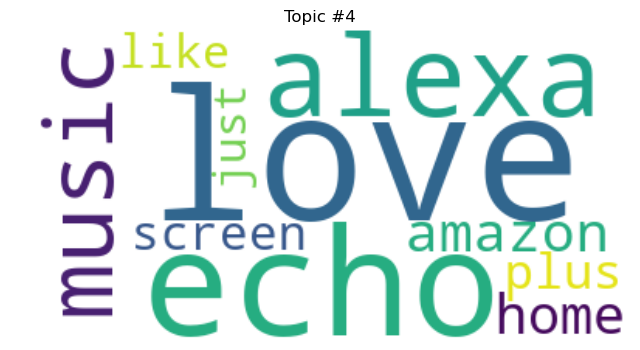

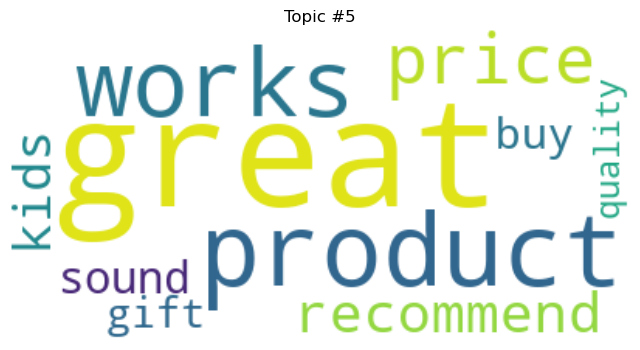

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For each topic, generate a word cloud
for topic_idx, topic in enumerate(nmf.components_):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies({terms[i]: topic[i] for i in topic.argsort()[:-11:-1]})
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic #{topic_idx + 1}")
    plt.axis('off')
    plt.show()

### Topic Modeling Results Interpretation
Once the topics are generated, the next step is to interpret the results. Here are some ways to analyze the topics:

Topic labels: Label each topic based on the top words, e.g., Performance, Battery, Design, etc.
Topic distribution: Check how the topics are distributed across the reviews. You can see which topics dominate particular reviews, which could give insights into which aspects of the product customers are talking about the most.

Visualizing the topics using tools like pyLDAvis or WordCloud can help in interpreting the results effectively.
You can also inspect which topics dominate specific reviews, which may help you to understand the focus areas of your reviews (such as features, performance, etc.).